<div style = "text-align:center">

 # EDA Com pandas
</div>



In [2]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis



### Carregamento do Dataset

In [3]:
# Carregar o dataset
df = pd.read_csv("evasao.csv")

# Verificar o número de linhas e colunas
print("Número de linhas e colunas:", df.shape , "\n")

pd.DataFrame(df)

Número de linhas e colunas: (11555, 15) 



,campus,curso,sexo,dataNascimento,estadoCivil,ocorrenciaDescricao,periodo,endereco,municipio,bairro,cep,uf,anoNascimento,anoIngresso,anoEvasao
0,CAMPUS CUIABÁ,ENGENHARIA CIVIL - SERIADO,M,1987-04-23 00:00:00.000,Solteiro(a),EXCLUSAO POR DESISTENCIA,20201,RUA CURSINO DO AMARANTE 1022,CUIABA,QUILOMBO,78045070,MT,1987.0,2008.0,2020
1,CAMPUS CUIABÁ,BACHARELADO EM CIÊNCIAS SOCIAIS,M,1992-04-16 00:00:00.000,Solteiro(a),EXCLUSAO POR DESISTENCIA,20201,"Rua A, n250",CUIABA,Bairro Residencial Paiaguas,78048258,MT,1992.0,2010.0,2020
2,CAMPUS CUIABÁ,ENGENHARIA SANITARIA E AMBIENTAL - SERIADO SEM,F,1990-10-10 00:00:00.000,Solteiro(a),EXCLUSAO POR DESISTENCIA,20201,RUA AMÂNCIO PEDROSO DE JESUS ...,CUIABA,CARUMBÉ,78050660,MT,1990.0,2009.0,2020
3,CAMPUS CUIABÁ,GEOLOGIA - SERIADO,M,1982-09-30 00:00:00.000,Solteiro(a),EXCLUSAO POR DESISTENCIA,20201,TRAVESSA AGUA CLARA - 119,AQUIDAUANA,COHAB NOVA,78025433,MS,1982.0,2010.0,2020
4,CAMPUS CUIABÁ,DIREITO - SERIADO MATUTINO,F,1992-01-10 00:00:00.000,Solteiro(a),EXCLUSAO POR DESISTENCIA,20201,"RUA I, N 91, CS 03, RES GOLDEN VILLE",CUIABA,ALVORADA,78048487,MT,1992.0,2010.0,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11550,CAMPUS SINOP,MEDICINA VETERINÁRIA - BACHARELADO,F,2005-09-30 00:00:00.000,Solteiro(a),EXCLUSAO CONFORME EDITAL SISU - PELA INSTITUIÇÃO,20241,"Avenida Curuá-Una, 7055",SANTAREM,Jutaí,68045000,PA,2005.0,2024.0,2024
11551,CAMPUS SINOP,ZOOTECNIA - BACHARELADO,F,2002-05-15 00:00:00.000,Solteiro(a),EXCLUSAO POR DESISTENCIA,20241,"Rua Vinte e Quatro, 174",BETIM,Capelinha,32678270,MG,2002.0,2024.0,2024
11552,CAMPUS SINOP,ENGENHARIA AGRÍCOLA E AMBIENTAL BACHARELADO,F,2003-03-28 00:00:00.000,Solteiro(a),EXCLUSAO CONFORME EDITAL SISU - PELA INSTITUIÇÃO,20241,"Rua G-1, 367",CUIABA,Residencial Nova Canaã,78052860,MT,2003.0,2024.0,2024
11553,CAMPUS SINOP,QUÍMICA - BACHARELADO,M,1980-11-01 00:00:00.000,Solteiro(a),EXCLUSAO CONFORME EDITAL SISU - PELA INSTITUIÇÃO,20241,"Rua Ary Barroso, 218",SINOP,Aquarela Brasil Residencial,78556554,MT,1980.0,2024.0,2024


### Informações gerais sobre o dataset


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11555 entries, 0 to 11554
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   campus               11555 non-null  object 
 1   curso                11555 non-null  object 
 2   sexo                 11555 non-null  object 
 3   dataNascimento       11554 non-null  object 
 4   estadoCivil          11555 non-null  object 
 5   ocorrenciaDescricao  11555 non-null  object 
 6   periodo              11555 non-null  int64  
 7   endereco             11555 non-null  object 
 8   municipio            11550 non-null  object 
 9   bairro               11555 non-null  object 
 10  cep                  11519 non-null  object 
 11  uf                   11550 non-null  object 
 12  anoNascimento        11554 non-null  float64
 13  anoIngresso          11552 non-null  float64
 14  anoEvasao            11555 non-null  int64  
dtypes: float64(2), int64(2), object(11)


In [5]:
#Verifica a quantidade de valores únicos por coluna 
df.nunique()

campus                     4
curso                    148
sexo                       2
dataNascimento          6065
estadoCivil                3
ocorrenciaDescricao       19
periodo                    9
endereco               10887
municipio                632
bairro                  3729
cep                     5168
uf                        27
anoNascimento             65
anoIngresso               24
anoEvasao                  5
dtype: int64

<div style = 'color: red;'> 

#### Observação: 

</div>
Para este dataset, as variáveis numéricas úteis são:anoNascimento, anoIngresso, anoEvasao. Logo irei criar a idade dos alunos no ano de ingresso e no ano de evasão




#### Conversão de colunas de data e criação de variáveis úteis

In [ ]:
# Convertendo data de nascimento para datetime
df['dataNascimento'] = pd.to_datetime(df['dataNascimento'], errors='coerce')

In [ ]:
#idade do aluno no ano de evasão 
df['idade_evasao'] = df['anoEvasao'] - df['dataNascimento'].dt.year


In [21]:
# Cálculo da idade no ano de ingresso
df['idade_ingresso'] = df['anoIngresso'] - df['dataNascimento'].dt.year

### Medidas de tendência central (idade)

#### Idade no Ingresso

In [22]:
print("\nMedidas de Tendência Central - Idade no Ingresso:\n")
print("Média:", df['idade_ingresso'].mean())
print("Mediana:", df['idade_ingresso'].median())
print("Moda:", df['idade_ingresso'].mode()[0])



Medidas de Tendência Central - Idade no Ingresso:

Média: 23.466279975759676
Mediana: 20.0
Moda: 19.0


#### Idade na evasão

In [ ]:
print("\nMedidas de Tendência Central - Idade na Evasão:\n")
print("Média:", df['idade_evasao'].mean())
print("Mediana:", df['idade_evasao'].median())
print("Moda:", df['idade_evasao'].mode()[0])



Medidas de Tendência Central - Idade na Evasão:

Média: 27.40643932837113
Mediana: 25.0
Moda: 20.0


### Medidas de dispersão (idade)

#### Idade no Ingresso

In [23]:
print("\nMedidas de Dispersão - Idade no Ingresso:\n")
print("Desvio padrão:", df['idade_ingresso'].std())
print("Variância:", df['idade_ingresso'].var())
print("Amplitude:", df['idade_ingresso'].max() - df['idade_ingresso'].min())



Medidas de Dispersão - Idade no Ingresso:

Desvio padrão: 7.680021960931796
Variância: 58.98273732039467
Amplitude: 72.0


#### Idade na evasão

In [ ]:
print("Desvio padrão:", df['idade_evasao'].std())
print("Variância:", df['idade_evasao'].var())
print("Amplitude:", df['idade_evasao'].max() - df['idade_evasao'].min())

Desvio padrão: 8.654356895057399
Variância: 74.89789326702754
Amplitude: 79.0


### Medidas de forma (idade)

#### Assimetria

##### Idade no Ingresso

In [ ]:
print("Assimetria (Skewness):", skew(df['idade_ingresso'].dropna()))

Assimetria (Skewness): 2.1238382287664317


##### Idade na evasão

In [ ]:
print("Assimetria (Skewness):", skew(df['idade_evasao'].dropna()))

Assimetria (Skewness): 1.5907306499442602


#### Curtose

##### Idade no Ingresso

In [ ]:
print("Curtose (Kurtosis):", kurtosis(df['idade_ingresso'].dropna()))

##### Idade na Evasão

In [13]:
print("Curtose (Kurtosis):", kurtosis(df['idade_evasao'].dropna()))

Curtose (Kurtosis): 2.950641791152405


### Quartis, IQR e detecção de outliers

### Idade no Ingresso

In [25]:
# Cálculo dos quartis e IQR
Q1 = df['idade_ingresso'].quantile(0.25)
Q3 = df['idade_ingresso'].quantile(0.75)
IQR = Q3 - Q1

# Limites para definir outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrando outliers
outliers = df[(df['idade_ingresso'] < limite_inferior) | (df['idade_ingresso'] > limite_superior)]

# Resultado
print("\nQuartis:")
print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print(f"Outliers encontrados: {len(outliers)}")



Quartis:
Q1: 19.0
Q3: 25.0
IQR: 6.0
Outliers encontrados: 1162


### Idade na Evasão

In [16]:
Q1 = df['idade_evasao'].quantile(0.25)
Q3 = df['idade_evasao'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = df[(df['idade_evasao'] < limite_inferior) | (df['idade_evasao'] > limite_superior)]
print("\nQuartis:")
print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print(f'Outliers encontrados: {len(outliers)}')



Quartis:
Q1: 21.0
Q3: 31.0
IQR: 10.0
Outliers encontrados: 520


### Visualizações

#### Histograma da idade no ingresso

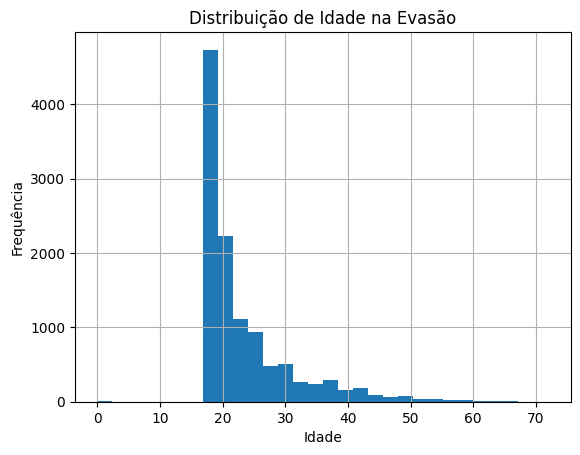

In [26]:
df['idade_ingresso'].hist(bins=30)
plt.title('Distribuição de Idade na Evasão')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()


#### Histograma da idade na evasão

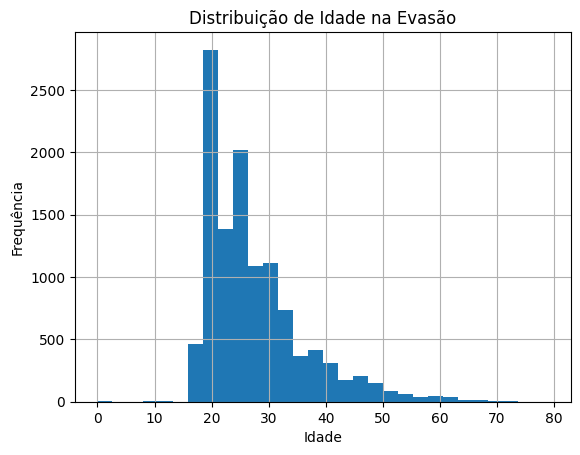

In [17]:
df['idade_evasao'].hist(bins=30)
plt.title('Distribuição de Idade na Evasão')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()


#### Boxplot da idade no Ingresso

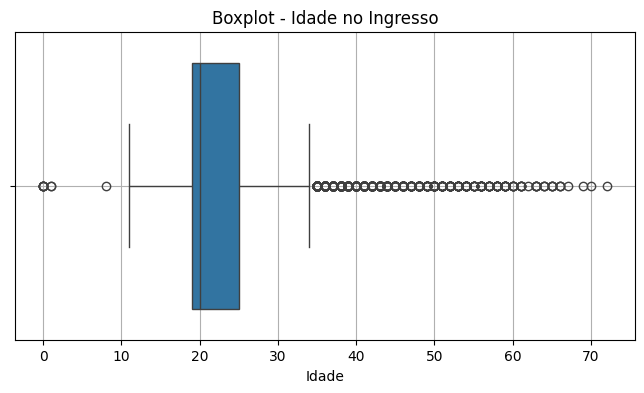

In [27]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['idade_ingresso'])
plt.title("Boxplot - Idade no Ingresso")
plt.xlabel("Idade")
plt.grid(True)
plt.show()

#### Boxplot da idade na Evasão

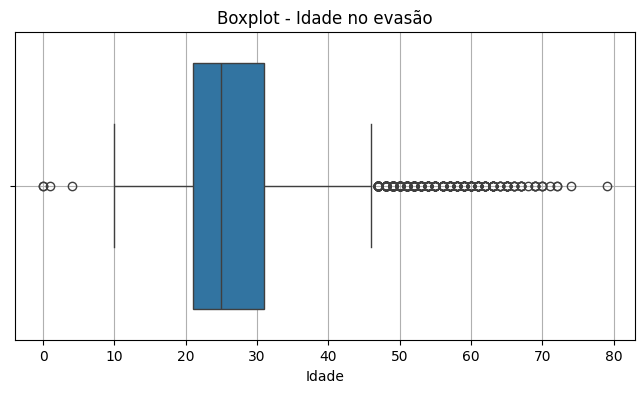

In [28]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['idade_evasao'])
plt.title("Boxplot - Idade no evasão")
plt.xlabel("Idade")
plt.grid(True)
plt.show()

<div style = "text-align:center">

# Análises Descritivas (panorama geral dos dados)
</div>



## Taxa de evasão por curso e campus

#### Quantidade e percentual de alunos evadidos por curso.

In [1]:
# Quantidade absoluta
evasao_por_curso= df['curso'].value_counts().sort_values(ascending=False)

print("Top 10 cursos com mais evasões:")
print(evasao_por_curso.head())

NameError: name 'df' is not defined

#### Percentual de evasões por curso

In [37]:
# Calculando o percentual de evasão por curso   
percentual_evasao_curso = df['curso'].value_counts(normalize=True).sort_values(ascending=False) * 100

print("\nTop 10 cursos com maior percentual de evasão:")
print(percentual_evasao_curso.head(10).round(2))


Top 10 cursos com maior percentual de evasão:
curso
PSICOLOGIA                                     3.95
ENGENHARIA ELÉTRICA                            3.83
ZOOTECNIA - BACHARELADO                        3.59
ENGENHARIA FLORESTAL - BACHARELADO             3.28
AGRONOMIA - BACHARELADO                        3.07
ESTATÍSTICA                                    2.75
NUTRIÇÃO - BACHARELADO                         2.72
ENGENHARIA CIVIL - SERIADO                     2.61
ARQUITETURA E URBANISMO - SERIADO SEMESTRAL    2.35
MEDICINA - BACHARELADO                         2.21
Name: proportion, dtype: float64


#### Visualização

Top 10 cursos com mais evasões

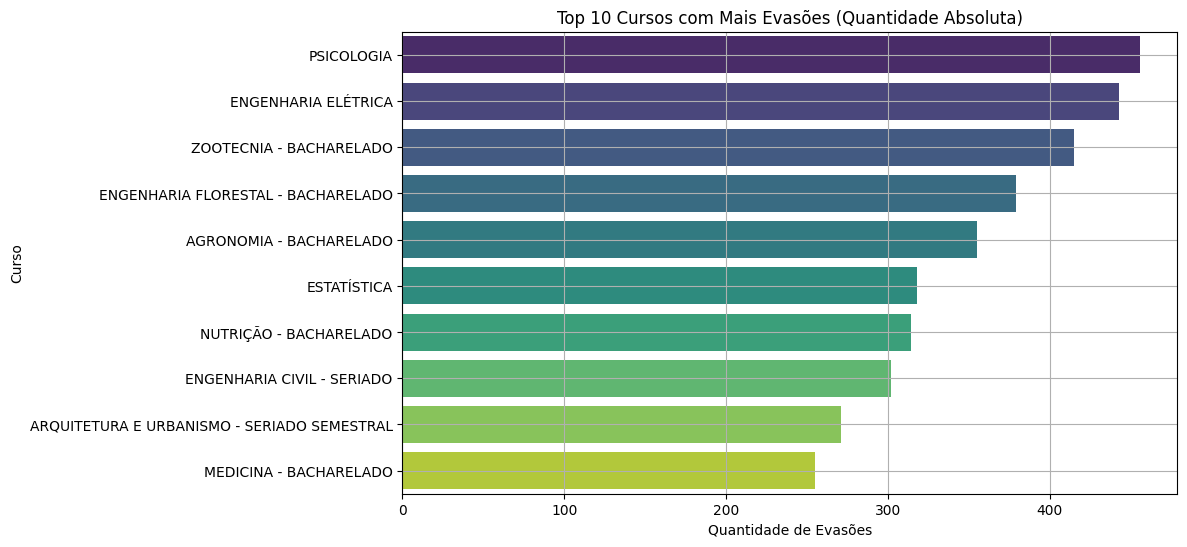

In [46]:
plt.figure(figsize=(10,6))
sns.barplot(
    x=evasao_por_curso.head(10).values,
    y=evasao_por_curso.head(10).index,
    hue=evasao_por_curso.head(10).index,
    palette="viridis",
    legend=False
)
plt.title("Top 10 Cursos com Mais Evasões (Quantidade Absoluta)")
plt.xlabel("Quantidade de Evasões")
plt.ylabel("Curso")
plt.grid(True)
plt.show()

### Comparação entre campi


#### Quantida de evasões por campus

In [54]:
#Quantidade absoluta
evasao_por_campus= df['campus'].value_counts().sort_values(ascending=False)

print("Evasões por campus:")
print(evasao_por_campus)

Evasões por campus:
campus
CAMPUS CUIABÁ           8022
CAMPUS SINOP            1476
CAMPUS ARAGUAIA         1422
CAMPUS VÁRZEA GRANDE     635
Name: count, dtype: int64


####  Percentual de evasões por campus

In [60]:
# Calculando o percentual de evasão por curso   
percentual_evasao_campus = df['campus'].value_counts(normalize=True).sort_values(ascending=False) * 100

print("\nPercentual de evasões por campus:")
print(percentual_evasao_campus.round(2))


Percentual de evasões por campus:
campus
CAMPUS CUIABÁ           69.42
CAMPUS SINOP            12.77
CAMPUS ARAGUAIA         12.31
CAMPUS VÁRZEA GRANDE     5.50
Name: proportion, dtype: float64


#### Visualização

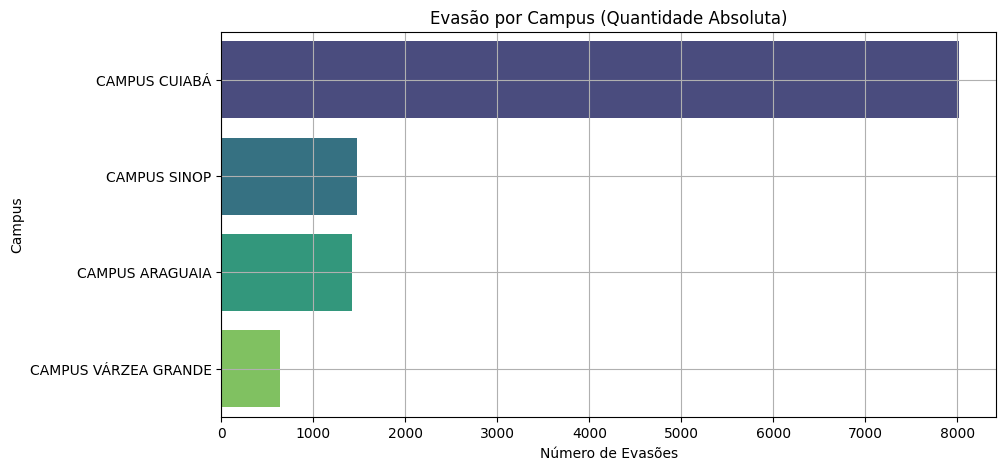

In [65]:
plt.figure(figsize=(10,5))
sns.barplot(
    x=evasao_por_campus.values,
    y=evasao_por_campus.index,
    hue=evasao_por_campus.index,
    palette="viridis",
    legend=False
)

plt.title("Evasão por Campus (Quantidade Absoluta)")
plt.xlabel("Número de Evasões")
plt.ylabel("Campus")
plt.grid(True)
plt.show()



## Distribuição por Sexo

### Percentual de evasão por sexo (masculino/feminino).

In [68]:
#quantidade de alunos que foram evadidos por sexo
evasao_por_sexo = df['sexo'].value_counts().sort_values(ascending=False)    
print("\nQuantidade de alunos evadidos por sexo:")
print(evasao_por_sexo)

# Percentual de evasão por sexo (masculino/feminino).
percentual_evasao_sexo = df['sexo'].value_counts(normalize=True) * 100
print("\nPercentual de evasão por sexo:")
print(percentual_evasao_sexo.round(2))



Quantidade de alunos evadidos por sexo:
sexo
M    5921
F    5634
Name: count, dtype: int64

Percentual de evasão por sexo:
sexo
M    51.24
F    48.76
Name: proportion, dtype: float64


## Distribuição por estado civil


### Ver se há correlação entre estado civil e evasão

In [78]:
total_evasoes = len(df)
print(f"Total de evasões registradas: {total_evasoes}\n")


# Contagem de evasões por estado civil
estado_evasao = df['estadoCivil'].value_counts()

# Percentual
estado_evasao_percentual = df['estadoCivil'].value_counts(normalize=True) * 100

print("Evasões por Estado Civil:\n")
print(estado_evasao)

print("\nPercentual de Evasões por Estado Civil:\n")
print(estado_evasao_percentual.round(2))

Total de evasões registradas: 11555

Evasões por Estado Civil:

estadoCivil
Solteiro(a)      10868
Casado(a)          630
Divorciado(a)       57
Name: count, dtype: int64

Percentual de Evasões por Estado Civil:

estadoCivil
Solteiro(a)      94.05
Casado(a)         5.45
Divorciado(a)     0.49
Name: proportion, dtype: float64


## Análises Temporais


### Evasão total por ano

In [79]:
# Agrupar por ano de evasão
evasao_ano = df['anoEvasao'].value_counts().sort_index()

print("Evasões por ano:")
print(evasao_ano)


Evasões por ano:
anoEvasao
2020    1013
2021    1361
2022    2269
2023    6212
2024     700
Name: count, dtype: int64


#### Gráfico: Evasão total por ano

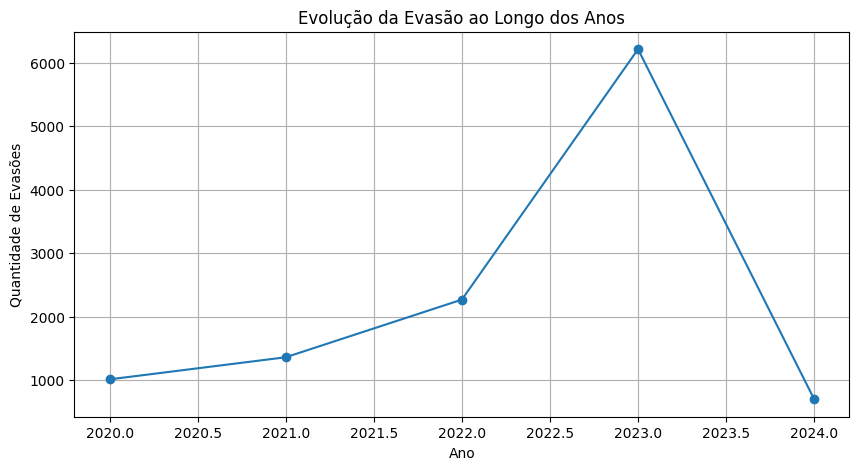

In [82]:
plt.figure(figsize=(10,5))
evasao_ano.plot(kind='line', marker='o')
plt.title("Evolução da Evasão ao Longo dos Anos")
plt.xlabel("Ano")
plt.ylabel("Quantidade de Evasões")
plt.grid(True)
plt.show()

#### Evasão por ano e por sexo

In [85]:
evasao_ano_sexo = df.groupby(['anoEvasao', 'sexo']).size().unstack()

print("Evasões por ano e sexo:")
print(evasao_ano_sexo.tail())

Evasões por ano e sexo:
sexo          F     M
anoEvasao            
2020        487   526
2021        703   658
2022        975  1294
2023       3117  3095
2024        352   348


#### Gráfico: Evasão por sexo ao longo dos anos

<Figure size 1000x500 with 0 Axes>

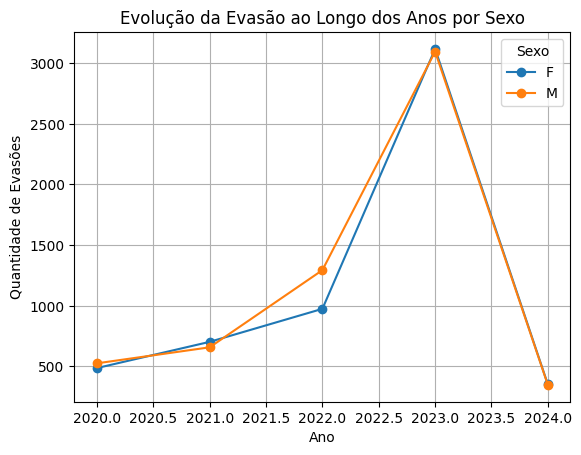

In [86]:
plt.figure(figsize=(10,5))
evasao_ano_sexo.plot(marker='o')
plt.title("Evolução da Evasão ao Longo dos Anos por Sexo")
plt.xlabel("Ano")
plt.ylabel("Quantidade de Evasões")
plt.grid(True)
plt.legend(title='Sexo')
plt.show()


#### Evasão por ano e por campus

In [87]:
# Agrupamento por ano e campus
evasao_ano_campus = df.groupby(['anoEvasao', 'campus']).size().unstack()

print("Evasões por ano e campus:")
print(evasao_ano_campus.tail())


Evasões por ano e campus:
campus     CAMPUS ARAGUAIA  CAMPUS CUIABÁ  CAMPUS SINOP  CAMPUS VÁRZEA GRANDE
anoEvasao                                                                    
2020                   149            651           129                    84
2021                   135            900           226                   100
2022                   327           1590           263                    89
2023                   729           4365           788                   330
2024                    82            516            70                    32


####  Gráfico: Evasão por campus ao longo dos anos



<Figure size 1200x1000 with 0 Axes>

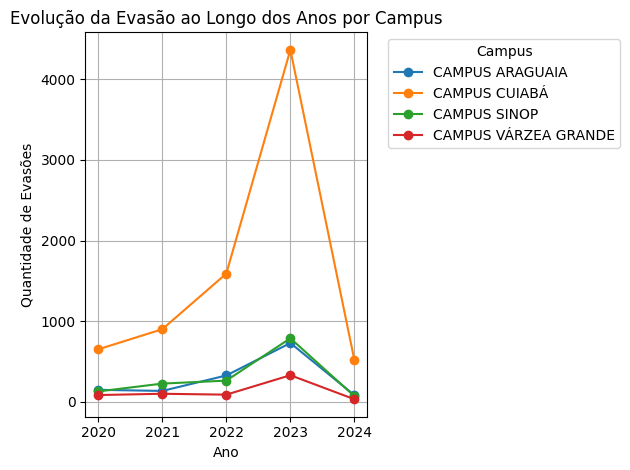

In [92]:
plt.figure(figsize=(12,10))
evasao_ano_campus.plot(marker='o')
plt.title("Evolução da Evasão ao Longo dos Anos por Campus")
plt.xlabel("Ano")
plt.ylabel("Quantidade de Evasões")
plt.grid(True)
plt.legend(title='Campus', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Tempo médio até a evasão



In [100]:
# Cálculo do tempo de permanência no curso
df['anos_no_curso'] = df['anoEvasao'] - df['anoIngresso']


In [101]:
print("Tempo médio até a evasão (em anos):")
print(f"Média: {df['anos_no_curso'].mean():.2f}")
print(f"Mediana: {df['anos_no_curso'].median():.2f}")
print(f"Desvio padrão: {df['anos_no_curso'].std():.2f}")


Tempo médio até a evasão (em anos):
Média: 3.94
Mediana: 3.00
Desvio padrão: 3.35


## Análises gográficas

### Evasão por munícipio ou estado (UF)

In [97]:
#mapeamente dos municípios/UF de origem com maiores índeces de evasão
evasao_por_municipio = df['municipio'].value_counts().sort_values(ascending=False)
print("\nTop 10 municípios com mais evasões:")
print(evasao_por_municipio.head(10))


Top 10 municípios com mais evasões:
municipio
CUIABA              6089
VARZEA GRANDE       1240
BARRA DO GARCAS      764
SINOP                732
ARAGARCAS            131
RONDONOPOLIS         101
SAO PAULO             77
SORRISO               66
TANGARA DA SERRA      60
BRASILIA              59
Name: count, dtype: int64


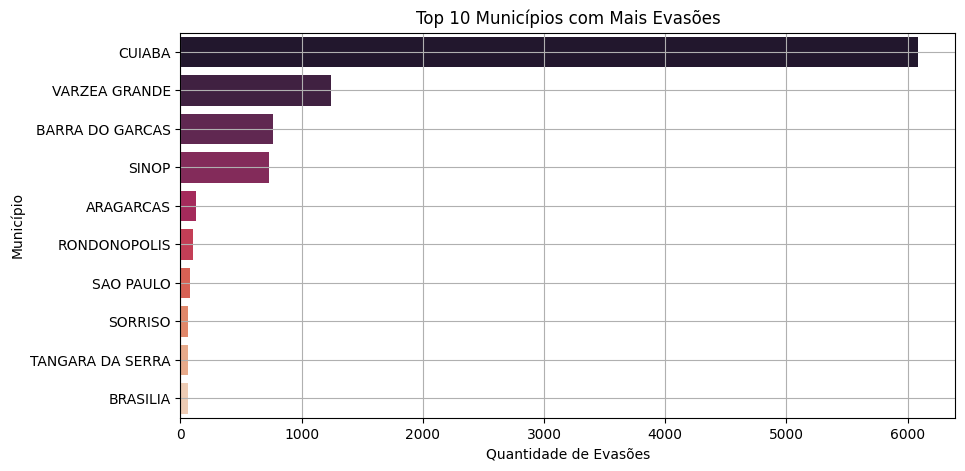

In [107]:
plt.figure(figsize=(10,5))
sns.barplot(
    x=evasao_por_municipio.head(10).values,
    y=evasao_por_municipio.head(10).index,
    hue=evasao_por_municipio.head(10).index,
    palette="rocket",
    legend=False
)
plt.title("Top 10 Municípios com Mais Evasões")
plt.xlabel("Quantidade de Evasões")
plt.ylabel("Município")
plt.grid(True)
plt.show()


In [113]:
evasao_uf = df['uf'].value_counts()
print("10 Estados de origem com mais índices de evasões\n")
print(evasao_uf.head(10))


10 Estados de origem com mais índices de evasões

uf
MT    10038
SP      370
GO      344
MG      147
RO      118
PA       82
RJ       67
DF       59
MS       52
PR       41
Name: count, dtype: int64


### Análise de bairros

In [116]:
evasao_por_bairro = df['bairro'].value_counts().sort_values(ascending=False)
print("\nTop 10  com mais evasões:")
print(evasao_por_bairro.head(10))


Top 10  com mais evasões:
bairro
Centro             348
Boa Esperança      213
CENTRO             158
Jardim Imperial    131
Morada da Serra    105
Dom Aquino          94
centro              93
Tijucal             84
Cristo Rei          78
Cidade Alta         76
Name: count, dtype: int64


## Análises por características acadêmicas

### Evasão por período de curso

In [123]:
# Considerando que os períodos 20201 e 20202 representam o 1º e 2º período
evasao_por_periodo = df['periodo'].value_counts().sort_index()
print("\nEvasões por período:")
print(evasao_por_periodo,"\n")

evasoes_inicio = evasao_por_periodo.loc[[20201, 20202]].sum()
evasoes_avancado = evasao_por_periodo.drop([20201, 20202]).sum()
#loc: seleciona os períodos 20201 e 20202 da série.
#drop: remove os períodos 20201 e 20202 da série, considerando que são os dois primeiros períodos do curso.

print(f"Evasões no início (1º e 2º período): {evasoes_inicio}")
print(f"Evasões em fases mais avançadas: {evasoes_avancado}\n")

if evasoes_inicio > evasoes_avancado:
    print("Há mais evasões no início do curso.")
else:
    print("Há mais evasões em fases mais avançadas do curso.")



Evasões por período:
periodo
20201     706
20202     307
20211     784
20212     577
20221    1682
20222     587
20231    5553
20232     659
20241     700
Name: count, dtype: int64 

Evasões no início (1º e 2º período): 1013
Evasões em fases mais avançadas: 10542

Há mais evasões em fases mais avançadas do curso.


### Tipos de ocorrência da evasão

In [126]:
# Agrupar e contar os tipos de ocorrência de evasão
tipos_ocorrencia = df['ocorrenciaDescricao'].value_counts()

print("Tipos de ocorrência de evasão mais comuns:\n")
print(tipos_ocorrencia.head(10))


Tipos de ocorrência de evasão mais comuns:

ocorrenciaDescricao
EXCLUSÃO DE VÍNCULO ACADÊMICO                              4116
EXCLUSAO POR DESISTENCIA                                   3481
EXCLUSAO POR TRANSFERENCIA DE REGIME                       1624
EXCLUSAO CONFORME EDITAL SISU - PELA INSTITUIÇÃO            943
EXCLUSAO POR TRANSFERENCIA INTERNA                          774
EXCLUÍDO POR DUPLICIDADE DE VÍNCULO - LEI NR. 12.089/09     210
EXCLUSAO POR TRANSFERENCIA DE TURNO                          98
EXCLUSAO POR TRANSFERENCIA EXTERNA                           67
EXCLUIDO POR SOLICITACAO DA IES                              52
EXCLUSAO POR DECISAO DO CONSUNI                              52
Name: count, dtype: int64


In [127]:
# Percentual de cada tipo
tipos_ocorrencia_percentual = df['ocorrenciaDescricao'].value_counts(normalize=True) * 100
print("\nPercentual dos tipos de ocorrência mais comuns:")
print(tipos_ocorrencia_percentual.head(10).round(2))


Percentual dos tipos de ocorrência mais comuns:
ocorrenciaDescricao
EXCLUSÃO DE VÍNCULO ACADÊMICO                              35.62
EXCLUSAO POR DESISTENCIA                                   30.13
EXCLUSAO POR TRANSFERENCIA DE REGIME                       14.05
EXCLUSAO CONFORME EDITAL SISU - PELA INSTITUIÇÃO            8.16
EXCLUSAO POR TRANSFERENCIA INTERNA                          6.70
EXCLUÍDO POR DUPLICIDADE DE VÍNCULO - LEI NR. 12.089/09     1.82
EXCLUSAO POR TRANSFERENCIA DE TURNO                         0.85
EXCLUSAO POR TRANSFERENCIA EXTERNA                          0.58
EXCLUIDO POR SOLICITACAO DA IES                             0.45
EXCLUSAO POR DECISAO DO CONSUNI                             0.45
Name: proportion, dtype: float64


## Análise Cruzadas

### Evasão por sexo × curso

In [136]:
# Tabela cruzada: evasão por sexo e curso
evasao_sexo_curso = pd.crosstab(df['curso'], df['sexo'])

# Exibir os top 10 cursos com mais evasões, separados por sexo
top10_cursos = evasao_por_curso.head(10).index
print(evasao_sexo_curso.loc[top10_cursos])

sexo                                           F    M
curso                                                
PSICOLOGIA                                   324  132
ENGENHARIA ELÉTRICA                           68  375
ZOOTECNIA - BACHARELADO                      260  155
ENGENHARIA FLORESTAL - BACHARELADO           159  220
AGRONOMIA - BACHARELADO                      108  247
ESTATÍSTICA                                  100  218
NUTRIÇÃO - BACHARELADO                       253   61
ENGENHARIA CIVIL - SERIADO                   105  197
ARQUITETURA E URBANISMO - SERIADO SEMESTRAL  194   77
MEDICINA - BACHARELADO                       127  128


### Evasão por campus x tempo até evasão

In [140]:
# Agrupar por campus e calcular estatísticas do tempo até a evasão
tempo_evasao_por_campus = df.groupby('campus')['anos_no_curso'].agg(['count', 'mean']).round(2)

print("Tempo até a evasão por campus (em anos):\n")
print(tempo_evasao_por_campus)

# count: número de evasões por campus
# mean: média de anos no curso até a evasão


Tempo até a evasão por campus (em anos):

                      count  mean
campus                           
CAMPUS ARAGUAIA        1422  4.67
CAMPUS CUIABÁ          8020  3.86
CAMPUS SINOP           1475  3.90
CAMPUS VÁRZEA GRANDE    635  3.37


### Estado Civil x tempo de permanência

In [146]:
# Agrupar por estado civil e calcular estatísticas do tempo de permanência
tempo_permanencia_estado_civil = df.groupby('estadoCivil')['anos_no_curso'].agg(['count', 'mean', 'median', 'std']).round(2)

print("Tempo de permanência no curso por estado civil (em anos):\n")
print(tempo_permanencia_estado_civil)



Tempo de permanência no curso por estado civil (em anos):

               count  mean  median   std
estadoCivil                             
Casado(a)        629  6.21     6.0  2.98
Divorciado(a)     57  6.58     7.0  2.92
Solteiro(a)    10866  3.79     3.0  3.32


### Município x Idade de evasão

In [150]:
municipio_idade = df.groupby('municipio')['idade_evasao'].mean().sort_values(ascending=False)

print("Top 10 municípios com maior média de idade na evasão:")
print(municipio_idade.head(10).round(1))


Top 10 municípios com maior média de idade na evasão:
municipio
MANDAGUARI     70.0
CAJAZEIRAS     59.0
MACEIO         52.0
LADARIO        49.0
ITATUBA        46.0
JAPIRA         43.0
APUCARANA      42.0
TARUMA         42.0
AREALVA        41.0
CASSILANDIA    38.7
Name: idade_evasao, dtype: float64


### Evasão por curso × ano de ingresso



In [ ]:
# Filtrar apenas anos de ingresso a partir de 2008
evasao_ano_ingresso_curso_2008 = evasao_ano_ingresso_curso.loc[2008.0:]

# Exibir os top 5 cursos com mais evasões ao longo dos anos de ingresso (de 2008 em diante)
print("Evasão por curso × ano de ingresso (top 5 cursos, de 2008 em diante):\n")
print(evasao_ano_ingresso_curso_2008[top5_cursos])

Evasão por curso × ano de ingresso (top 5 cursos):

curso        PSICOLOGIA  ENGENHARIA ELÉTRICA  ZOOTECNIA - BACHARELADO  \
anoIngresso                                                             
1996.0                0                    0                        0   
2002.0                0                    0                        0   
2003.0                0                    0                        0   
2004.0                0                    0                        0   
2005.0                0                    0                        0   
2006.0                0                    0                        0   
2007.0                0                    0                        0   
2008.0                0                    0                        0   
2009.0                0                    0                        1   
2010.0                1                    2                        0   
2011.0                0                    4                        6   

In [4]:
print("Campi disponíveis:")
print(df['campus'].unique())

print("\nUFs de origem dos alunos:")
print(df['uf'].unique())


Campi disponíveis:
['CAMPUS CUIABÁ' 'CAMPUS ARAGUAIA' 'CAMPUS SINOP' 'CAMPUS VÁRZEA GRANDE']

UFs de origem dos alunos:
['MT' 'MS' 'GO' 'SP' 'RO' 'PA' 'RJ' 'MG' 'BA' 'MA' 'TO' 'ES' 'PI' 'DF'
 'PE' 'RS' 'CE' 'PR' 'AM' 'SC' 'RN' 'AP' 'AL' 'PB' 'SE' 'AC' 'RR' nan]


In [11]:
# Comparando a quantidade de ingressantes de fora do estado vs de MT
qtd_mt = contagem[False]
qtd_fora = contagem[True]

print(f"Ingressantes de MT: {qtd_mt}")
print(f"Ingressantes de outras UFs: {qtd_fora}")
print(f"Total de ingressantes: {qtd_mt + qtd_fora}")
print(f"Percentual de fora: {percentuais[True]:.2f}%")
print(f"Percentual de MT: {percentuais[False]:.2f}%")

Ingressantes de MT: 10038
Ingressantes de outras UFs: 1517
Total de ingressantes: 11555
Percentual de fora: 13.13%
Percentual de MT: 86.87%


In [7]:
# Listar quantidade de alunos ingressantes de cada UF diferente de MT, um por um
fora_mt = df[df['fora_do_estado']]
contagem_uf_fora = fora_mt['uf'].value_counts()

print("Quantidade de alunos ingressantes de fora de MT por UF:")
for uf, qtd in contagem_uf_fora.items():
    print(f"{uf}: {qtd}")


Quantidade de alunos ingressantes de fora de MT por UF:
SP: 370
GO: 344
MG: 147
RO: 118
PA: 82
RJ: 67
DF: 59
MS: 52
PR: 41
BA: 36
MA: 28
TO: 22
CE: 19
AM: 19
RS: 17
ES: 16
PI: 13
SC: 13
PE: 11
AC: 9
AP: 7
RN: 7
PB: 6
AL: 5
SE: 3
RR: 1


Quantidade de Alunos Evadidos De dentro e fora do estado do Mato Grosso

In [8]:
evasao_local_vs_fora = df['fora_do_estado'].value_counts()
labels = ['Locais (MT)', 'De outras UFs']
for label, qtd in zip(labels, evasao_local_vs_fora.values[::-1]):
    print(f"{label}: {qtd}")


Locais (MT): 1517
De outras UFs: 10038


Quantidade de alunos evadidos Por estado

In [12]:
evasao_uf = df['uf'].value_counts()
print("Quantidade de evasões por UF:")
print(evasao_uf)

Quantidade de evasões por UF:
uf
MT    10038
SP      370
GO      344
MG      147
RO      118
PA       82
RJ       67
DF       59
MS       52
PR       41
BA       36
MA       28
TO       22
CE       19
AM       19
RS       17
ES       16
PI       13
SC       13
PE       11
AC        9
AP        7
RN        7
PB        6
AL        5
SE        3
RR        1
Name: count, dtype: int64


In [9]:
total_evasoes = len(df)
percentuais = (evasao_local_vs_fora / total_evasoes * 100).round(2)

print("\nPercentual de evasão por origem:")
for label, pct in zip(labels, percentuais.values[::-1]):
    print(f"{label}: {pct}%")



Percentual de evasão por origem:
Locais (MT): 13.13%
De outras UFs: 86.87%
